In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Satellite Data

In [2]:
# defintion of Tg (Teragram)
Tera=10**12

# Converting Tg of SO2 detected by satelllites (Milford et al., 2023)
mass_SO2_tg_sat=1.84*Tera

#Converting Tg of SO2 to kg of SO2
mass_SO2_kg_sat=mass_SO2_tg_sat/1000

# converting from kg SO2 to kg of Sulfur
mass_S_kg_sat=mass_SO2_kg_sat/2

mass_S_Tg_sat=mass_S_kg_sat/10**9
print('Mass Measured Megatones of Sulfur by Satellite')
mass_S_Tg_sat

Mass Measured Megatones of Sulfur by Satellite


0.92

In [3]:
## Erupted Volume (Tephra, lava, edifice) (Civico et al., 2022)
tephra_lava_vol_m3=217.4*10**6
tephra_lava_vol_m3_err=6.6*10**6
edifice_vol_m3=36.5*10**6
edifice_vol_m3_err=0.3*10**6
erupted_vol_m3=edifice_vol_m3+tephra_lava_vol_m3

#  Density of erupted material (kg/m3) (Densityx Calcs from this work, Error from Gisbert et al., 2023)
density_erup_kgm3=2700*0.89 # Reducing density based on average of vesicles (11%, from Gisbert et al., 2023)
density_erup_err_kgm3=((2700*0.06)**2 + (50)**2)**0.5 #assuming 6% vesicle error (Gisbert et al., 2023 range 7.4-16.6%) plus DensityX error of 50 kg/m^3 

# Mass of erupted producs
Mass_erup_kg=erupted_vol_m3*density_erup_kgm3

# Volume Fraction to Mass fraction crystal (from Ubide et al., 2023 Table S1 point counting average)
volume_frac_cryst=0.21  
volume_cryst_m3=erupted_vol_m3*volume_frac_cryst
density_cryst_kgm3=3010
mass_cryst_kg=volume_cryst_m3*density_cryst_kgm3
mass_frac_cryst=mass_cryst_kg/Mass_erup_kg
mass_frac_cryst_err=0.3 #Based on range of point-counting data

#Mass of melt 
mass_erup_melt_kg=Mass_erup_kg*(1-mass_frac_cryst)

#Sulfur Content (PEC Corrected MI and matrix glass Average Values all eruption)
S_MI_ppm=3062
S_matrix_ppm=345
S_degass_ppm=(S_MI_ppm-S_matrix_ppm)

#Mass of erupted sulfur
Mass_erupted_S_Pet_test=S_degass_ppm*mass_erup_melt_kg/(10**6)

#in terms of variables for Monte Carlo
Mass_erupted_S_Pet=(S_MI_ppm-S_matrix_ppm)*((edifice_vol_m3+tephra_lava_vol_m3)*density_erup_kgm3*(1-mass_frac_cryst))/(10**6)

Mass_erupted_S_Mt=Mass_erupted_S_Pet/10**9
Mass_erupted_SO2_Mt=Mass_erupted_S_Mt*2
print('Mass Erupted Megatonnes of SO2')
Mass_erupted_SO2_Mt

Mass Erupted Megatonnes of SO2


2.44329762534

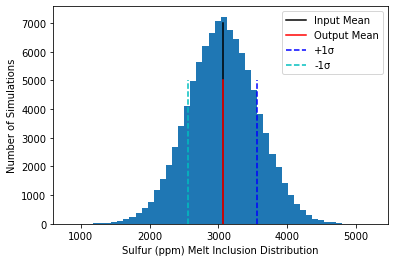

3062.021942409744 3563.4938717782475 2560.5500130412406 501.4719293685035


In [4]:
#Melt Inclusion and Matrix Glass Monte Carlo for Error Anlaysis
N_dup=100000 #number of duplicates

# S in Melt Inclusion Error
S_MI_err_ppm=500

#Normal Distribution of S in Melt Inclusions with Melt Inclusion Error
S_MI_MC=np.random.normal(S_MI_ppm, S_MI_err_ppm, N_dup)

#mean S MI MC
S_MI_Mean_MC = np.nanmean(S_MI_MC)

#standard distribution of values 
S_MI_std = np.std(S_MI_MC)

#plus and minus 1sigma
S_MI_plus_std = S_MI_std+S_MI_Mean_MC
S_MI_minus_std = S_MI_Mean_MC-S_MI_std
 
plt.hist(S_MI_MC, bins=50)
plt.plot([S_MI_ppm, S_MI_ppm], [0, 7000], '-k', label='Input Mean')
plt.plot([S_MI_Mean_MC, S_MI_Mean_MC], [0, 5000], '-r', label='Output Mean')
plt.plot([S_MI_plus_std, S_MI_plus_std], [0, 5000], '--b', label='+1\u03C3')
plt.plot([S_MI_minus_std, S_MI_minus_std], [0, 5000], '--c', label='-1\u03C3')


plt.legend()
plt.xlabel('Sulfur (ppm) Melt Inclusion Distribution')
plt.ylabel('Number of Simulations')

#plt.savefig('S_MI_dis.pdf')
plt.show()

print(S_MI_Mean_MC, S_MI_plus_std, S_MI_minus_std, S_MI_std)

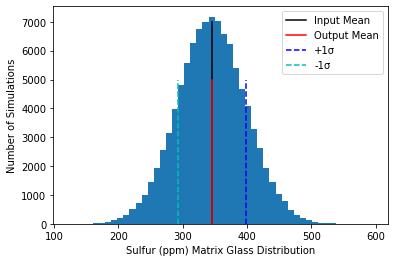

344.8715885354733 397.75768459697815 291.9854924739684 52.8860960615049


In [5]:
#Normal Distribution of S in Matrix Glasses with Matrix Glass Error
S_matrix_err_ppm=53
S_Matrix_MC=np.random.normal(S_matrix_ppm, S_matrix_err_ppm, N_dup)

#mean S MI MC
S_Matrix_Mean_MC = np.nanmean(S_Matrix_MC)

#standard distribution of values 
S_Matrix_std = np.std(S_Matrix_MC)

#plus and minus 1sigma
S_Matrix_plus_std = S_Matrix_std+S_Matrix_Mean_MC
S_Matrix_minus_std = S_Matrix_Mean_MC-S_Matrix_std
 
plt.hist(S_Matrix_MC, bins=50)
plt.plot([S_matrix_ppm, S_matrix_ppm], [0, 7000], '-k', label='Input Mean')
plt.plot([S_Matrix_Mean_MC, S_Matrix_Mean_MC], [0, 5000], '-r', label='Output Mean')
plt.plot([S_Matrix_plus_std, S_Matrix_plus_std], [0, 5000], '--b', label='+1\u03C3')
plt.plot([S_Matrix_minus_std, S_Matrix_minus_std], [0, 5000], '--c', label='-1\u03C3')


plt.xlabel('Sulfur (ppm) Matrix Glass Distribution')
plt.ylabel('Number of Simulations')

plt.legend()

#plt.savefig('S_Matrix_dis.pdf')
plt.show()

print(S_Matrix_Mean_MC, S_Matrix_plus_std, S_Matrix_minus_std, S_Matrix_std)

In [6]:
#creating crystal mass fraction distribution
tephra_lava_vol_m3_MC=np.random.normal(tephra_lava_vol_m3, tephra_lava_vol_m3_err, N_dup)
edifice_vol_m3_MC=np.random.normal(edifice_vol_m3, edifice_vol_m3_err, N_dup)
density_erup_MC=np.random.normal(density_erup_kgm3, density_erup_err_kgm3, N_dup)
mass_frac_cryst_MC = []

while len(mass_frac_cryst_MC) < N_dup:

    sample = np.random.normal(mass_frac_cryst, mass_frac_cryst_err/2)

    if 0 <= sample <= 1:

        mass_frac_cryst_MC.append(sample)
        
mass_frac_cryst_MC = np.array(mass_frac_cryst_MC)


In [7]:
#crystal fraction dist values 

#standard deviation of crystal fraction distribution 
std_dev_cryst = np.std(mass_frac_cryst_MC)

#mean crystal distribution
mean_mass_frac_cryst_MC = np.nanmean(mass_frac_cryst_MC)

#84th and 16th percentile 
eightyfourth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 84)
sixteenth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 16)
plus_sig_mass_frac_cryst_MC = eightyfourth_mass_frac_cryst_MC-mean_mass_frac_cryst_MC
minus_sig_mass_frac_cryst_MC = mean_mass_frac_cryst_MC-sixteenth_mass_frac_cryst_MC

#1sigma
pos_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) + std_dev_cryst
neg_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) - std_dev_cryst

#print(std_dev_cryst, mean_mass_frac_cryst_MC, pos_std_dev_cryst, neg_std_dev_cryst, plus_sig_mass_frac_cryst_MC, minus_sig_mass_frac_cryst_MC)

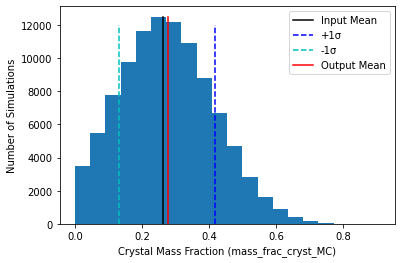

In [8]:
#plotting crystal mass fraction distribution

plt.hist(mass_frac_cryst_MC, bins=20)

plt.plot([mass_frac_cryst, mass_frac_cryst], [0, 12500],'-k', label='Input Mean')
plt.plot([eightyfourth_mass_frac_cryst_MC, eightyfourth_mass_frac_cryst_MC], [0, 12000], '--b', label='+1\u03C3')
plt.plot([sixteenth_mass_frac_cryst_MC, sixteenth_mass_frac_cryst_MC], [0, 12000], '--c', label='-1\u03C3')
plt.plot([np.nanmean(mass_frac_cryst_MC), np.nanmean(mass_frac_cryst_MC)], [0, 12500],'-r', label='Output Mean')


plt.xlabel('Crystal Mass Fraction (mass_frac_cryst_MC)')
plt.ylabel('Number of Simulations')

plt.legend()

#plt.savefig('crystal_fraction.pdf')

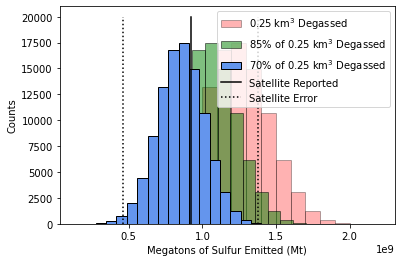

In [9]:
#plotting Mass of Sulfur vs Satellite Reported
Mass_of_lava=(edifice_vol_m3_MC+tephra_lava_vol_m3_MC)*density_erup_MC*(1-mass_frac_cryst_MC)

## all degassing equally
Mass_erupted_S_Pet_MC=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg))/(10**6)

# partial degassing
frac_degassing=0.85
Mass_erupted_S_Pet_MC_partial_degassing=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*frac_degassing))/(10**6)

# partial degassing 
frac_degassing_30=0.7
Mass_erupted_S_Pet_MC_partial_degassing_30=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_30))/(10**6)


# What if there was a more volume than we thought from underwater delta
#delta_prop=0.2
#Mass_erupted_20_delta=((S_MI_MC-S_matrix_MC)*(mass_erup_melt_kg*(1+delta_prop)))/(10**6)


plt.hist(Mass_erupted_S_Pet_MC, bins=20, label='0.25 km$^3$ Degassed',ec='k', fc='red', alpha=0.3)
plt.hist(Mass_erupted_S_Pet_MC_partial_degassing, bins=20, label='85% of 0.25 km$^3$ Degassed', ec='k', fc='green', alpha=0.5)
plt.hist(Mass_erupted_S_Pet_MC_partial_degassing_30, bins=20, label='70% of 0.25 km$^3$ Degassed', ec='k', fc='cornflowerblue')
#plt.hist(Mass_erupted_20_delta, label='delta', ec='blue', fc='orange')


plt.plot([mass_S_kg_sat, mass_S_kg_sat], [0, 20000], '-k', label='Satellite Reported')
sat_err=0.5 #MOUNTS (Valade et al., 2019)
plt.plot([mass_S_kg_sat*(1-sat_err), mass_S_kg_sat*(1-sat_err)], [0, 20000], ':k', label='Satellite Error')
plt.plot([mass_S_kg_sat*(1+sat_err), mass_S_kg_sat*(1+sat_err)], [0, 20000], ':k',)

plt.xlabel('Megatons of Sulfur Emitted (Mt)')
plt.ylabel('Counts')

plt.legend()


Text(0, 0.5, 'Number of Simulations')

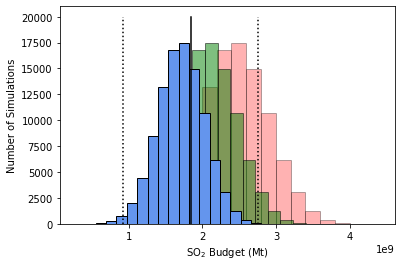

In [10]:
#plotting Mass of SO2 vs Satellite Reported (above plot times 2 for S to SO2 conversion)
Mass_of_lava=(edifice_vol_m3_MC+tephra_lava_vol_m3_MC)*density_erup_MC*(1-mass_frac_cryst_MC)

## all degassing equally
Mass_erupted_S_Pet_MC=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg))/(10**6)

# partial degassing
frac_degassing=0.85
Mass_erupted_S_Pet_MC_partial_degassing=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*frac_degassing))/(10**6)

# partial degassing 
frac_degassing_30=0.7
Mass_erupted_S_Pet_MC_partial_degassing_30=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_30))/(10**6)


# What if there was a more volume than we thought from underwater delta
#delta_prop=0.2
#Mass_erupted_20_delta=((S_MI_MC-S_matrix_MC)*(mass_erup_melt_kg*(1+delta_prop)))/(10**6)


plt.hist(2*Mass_erupted_S_Pet_MC, bins=20, label='0.25 km$^3$ Degassed',ec='k', fc='red', alpha=0.3)
plt.hist(2*Mass_erupted_S_Pet_MC_partial_degassing, bins=20, label='85% of 0.25 km$^3$ Degassed', ec='k', fc='green', alpha=0.5)
plt.hist(2*Mass_erupted_S_Pet_MC_partial_degassing_30, bins=20, label='70% of 0.25 km$^3$ Degassed', ec='k', fc='cornflowerblue')
#plt.hist(2*Mass_erupted_20_delta, label='Delta', ec='blue', fc='orange')


plt.plot([mass_S_kg_sat*2, mass_S_kg_sat*2], [0, 20000], '-k', label='Milford et al., 2023 Satellite Estimate ')
sat_err=0.5 #MOUNTS (Valade et al., 2019)
plt.plot([mass_S_kg_sat*2*(1-sat_err), mass_S_kg_sat*2*(1-sat_err)], [0, 20000], ':k', label='Milford et al., 2023 Satellite Error')
plt.plot([mass_S_kg_sat*2*(1+sat_err), mass_S_kg_sat*2*(1+sat_err)], [0, 20000], ':k',)

plt.xlabel('SO$_2$ Budget (Mt)')
plt.ylabel('Number of Simulations')

#plt.legend()

#plt.savefig("LP_MI_SO2_Emitted_1_30_24.pdf", format="pdf")


In [11]:
#SO2
#mean, median, and standard deviation 

#all 0.25km^3 degassed
mean_full_degassing_SO2 = np.mean(Mass_erupted_S_Pet_MC*2)/1e9
median_full_degassing_SO2 = np.median(Mass_erupted_S_Pet_MC*2)/1e9
std_dev_full_degassing_SO2 = np.std(Mass_erupted_S_Pet_MC*2)/1e9
eightyfourth_full_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC*2, 84)/1e9
sixteenth_full_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC*2, 16)/1e9
eightyfourth_sig_SO2 = eightyfourth_full_degassing_SO2_MC-mean_full_degassing_SO2
sixteenth_sig_SO2 = mean_full_degassing_SO2-sixteenth_full_degassing_SO2_MC
mean_minus_full_SO2 = mean_full_degassing_SO2-std_dev_full_degassing_SO2
mean_plus_full_SO2 = mean_full_degassing_SO2+std_dev_full_degassing_SO2

#85% of 0.25 km^3 Degassed
mean_85_percent_degassed = np.mean(Mass_erupted_S_Pet_MC_partial_degassing*2)/1e9
median_85_percent_degassed = np.median(Mass_erupted_S_Pet_MC_partial_degassing*2)/1e9
std_dev_85_percent_degassed = np.std(Mass_erupted_S_Pet_MC_partial_degassing*2)/1e9
eightyfourth_85_percent_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC_partial_degassing*2, 84)/1e9
sixteenth_85_percent_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC_partial_degassing*2, 16)/1e9
eightyfourth_sig_SO2_85_percent = eightyfourth_85_percent_degassing_SO2_MC-mean_85_percent_degassed
sixteenth_sig_SO2_85_percent = mean_85_percent_degassed-sixteenth_85_percent_degassing_SO2_MC

#70% of 0.25 km^3 Degassed
mean_70_percent_degassed = np.mean(Mass_erupted_S_Pet_MC_partial_degassing_30*2)/1e9
median_70_percent_degassed = np.median(Mass_erupted_S_Pet_MC_partial_degassing_30*2)/1e9
std_dev_70_percent_degassed = np.std(Mass_erupted_S_Pet_MC_partial_degassing_30*2)/1e9
eightyfourth_70_percent_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC_partial_degassing_30*2, 84)/1e9
sixteenth_70_percent_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC_partial_degassing_30*2, 16)/1e9
eightyfourth_sig_SO2_70_percent = eightyfourth_70_percent_degassing_SO2_MC-mean_70_percent_degassed
sixteenth_sig_SO2_70_percent = mean_70_percent_degassed-sixteenth_70_percent_degassing_SO2_MC


#Print
print("0.25 km $^3$ Degassed")
print("Full Degassing - Mean:", mean_full_degassing_SO2)
print("Full Degassing - Median:", median_full_degassing_SO2)
print("Full Degassing - Standard Deviation:", std_dev_full_degassing_SO2)
#print("+1 sig",mean_plus_full_SO2) 
#print("-1 sig",mean_minus_full_SO2) 
print("84th 1sig", eightyfourth_sig_SO2)
print("16th 1sig", sixteenth_sig_SO2)
#print("84th", eightyfourth_full_degassing_SO2_MC)
#print("16th", sixteenth_full_degassing_SO2_MC)
print("")    
print("85% of 0.25 km $^3$ Degassed")
print("85% Degassed - Mean:", mean_85_percent_degassed)
print("85% Degassed - Median:", median_85_percent_degassed)
print("85% Degassed - Standard Deviation:", std_dev_85_percent_degassed)
print("85% Degassed - 84th 1sig", eightyfourth_sig_SO2_85_percent)
print("85% Degassed- 16th 1sig", sixteenth_sig_SO2_85_percent)
print("")
print("70% of 0.25 km $^3$ Degassed")
print("70% Degassed - Mean:", mean_70_percent_degassed)
print("70% Degassed - Median:", median_70_percent_degassed)
print("70% Degassed - Standard Deviation:", std_dev_70_percent_degassed)
print("70% Degassed - 84th 1sig", eightyfourth_sig_SO2_70_percent)
print("70% Degassed- 16th 1sig", sixteenth_sig_SO2_70_percent)

0.25 km $^3$ Degassed
Full Degassing - Mean: 2.4434328330190453
Full Degassing - Median: 2.442654847285641
Full Degassing - Standard Deviation: 0.45354869892569016
84th 1sig 0.45079446165856485
16th 1sig 0.44895795010126216

85% of 0.25 km $^3$ Degassed
85% Degassed - Mean: 2.0769179080661893
85% Degassed - Median: 2.0762566201927948
85% Degassed - Standard Deviation: 0.38551639408683663
85% Degassed - 84th 1sig 0.38317529240977954
85% Degassed- 16th 1sig 0.3816142575860737

70% of 0.25 km $^3$ Degassed
70% Degassed - Mean: 1.7104029831133318
70% Degassed - Median: 1.7098583930999485
70% Degassed - Standard Deviation: 0.3174840892479831
70% Degassed - 84th 1sig 0.31555612316099513
70% Degassed- 16th 1sig 0.31427056507088347


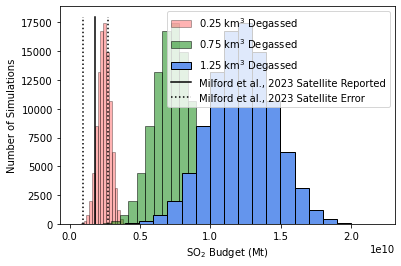

In [12]:
#extra eruptive volume degassing
 

#plotting Mass of SO2 vs Satellite Reported (above plot times 2 for S to SO2 conversion)
Mass_of_lava=(edifice_vol_m3_MC+tephra_lava_vol_m3_MC)*density_erup_MC*(1-mass_frac_cryst_MC)

##if 0.25 km^3 degassed completely
Mass_erupted_S_Pet_MC=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg))/(10**6)

# if 0.5 km^3 erupted
extra_degasing_2=2
Mass_erupted_S_Pet_MC_extra_2=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*extra_degasing_2))/(10**6)

# if 0.75 km^3 erupted
extra_degasing_3=3
Mass_erupted_S_Pet_MC_extra_3=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*extra_degasing_3))/(10**6)

#if 1 km^3 erupted
extra_degasing_4=4
Mass_erupted_S_Pet_MC_extra_4=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*extra_degasing_4))/(10**6)

#if 1.25 km^3 erupted
extra_degasing_5=5
Mass_erupted_S_Pet_MC_extra_5=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*extra_degasing_5))/(10**6)

#if 1.5 km^3 erupted
extra_degasing_6=6
Mass_erupted_S_Pet_MC_extra_6=((S_MI_MC-S_Matrix_MC)*(mass_erup_melt_kg*extra_degasing_6))/(10**6)




plt.hist(2*Mass_erupted_S_Pet_MC, bins=20, label='0.25 km$^3$ Degassed ',ec='k', fc='red', alpha=0.3)
#plt.hist(2*Mass_erupted_S_Pet_MC_extra_2, bins=20, label='0.5 km$^3$ Degassed', ec='k', fc='orange', alpha=0.5)
plt.hist(2*Mass_erupted_S_Pet_MC_extra_3, bins=20, label='0.75 km$^3$ Degassed', ec='k', fc='green', alpha=0.5)
#plt.hist(2*Mass_erupted_S_Pet_MC_extra_4, bins=20, label='1 km$^3$ Degassed', ec='k', fc='yellow',)
plt.hist(2*Mass_erupted_S_Pet_MC_extra_5, bins=20, label='1.25 km$^3$ Degassed', ec='k', fc='cornflowerblue',)
#plt.hist(2*Mass_erupted_S_Pet_MC_extra_6, bins=20, label='1.5 km$^3$ Degassed', ec='k', fc='blue',)


plt.plot([mass_S_kg_sat*2, mass_S_kg_sat*2], [0, 18000], '-k', label='Milford et al., 2023 Satellite Reported')
sat_err=0.5 #MOUNTS (Valade et al., 2019)
plt.plot([mass_S_kg_sat*2*(1-sat_err), mass_S_kg_sat*2*(1-sat_err)], [0, 18000], ':k', label='Milford et al., 2023 Satellite Error')
plt.plot([mass_S_kg_sat*2*(1+sat_err), mass_S_kg_sat*2*(1+sat_err)], [0, 18000], ':k',)

plt.xlabel('SO$_2$ Budget (Mt)')
plt.ylabel('Number of Simulations')

plt.legend()

#plt.savefig("LP_MI_SO2_Extra_Emitted_1_30_24.pdf", format="pdf")



In [13]:
#SO2
#mean, median, and standard deviation 

#all 0.25km^3 degassed
mean_full_degassing_SO2 = np.mean(Mass_erupted_S_Pet_MC*2)/1e9
median_full_degassing_SO2 = np.median(Mass_erupted_S_Pet_MC*2)/1e9
std_dev_full_degassing_SO2 = np.std(Mass_erupted_S_Pet_MC*2)/1e9
eightyfourth_full_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC*2, 84)/1e9
sixteenth_full_degassing_SO2_MC = np.percentile(Mass_erupted_S_Pet_MC*2, 16)/1e9
eightyfourth_sig_SO2 = eightyfourth_full_degassing_SO2_MC-mean_full_degassing_SO2
sixteenth_sig_SO2 = mean_full_degassing_SO2-sixteenth_full_degassing_SO2_MC
mean_minus_full_SO2 = mean_full_degassing_SO2-std_dev_full_degassing_SO2
mean_plus_full_SO2 = mean_full_degassing_SO2+std_dev_full_degassing_SO2


#0.5 km^3 degassed
mean_full_degassing_SO2_extra_2 = np.mean(Mass_erupted_S_Pet_MC_extra_2*2)/1e9
median_full_degassing_SO2_extra_2 = np.median(Mass_erupted_S_Pet_MC_extra_2*2)/1e9
std_dev_full_degassing_SO2_extra_2 = np.std(Mass_erupted_S_Pet_MC_extra_2*2)/1e9
eightyfourth_full_degassing_SO2_MC_extra_2 = np.percentile(Mass_erupted_S_Pet_MC_extra_2*2, 84)/1e9
sixteenth_full_degassing_SO2_MC_extra_2 = np.percentile(Mass_erupted_S_Pet_MC_extra_2*2, 16)/1e9
eightyfourth_sig_SO2_extra_2 = eightyfourth_full_degassing_SO2_MC_extra_2-mean_full_degassing_SO2_extra_2
sixteenth_sig_SO2_extra_2 = mean_full_degassing_SO2_extra_2-sixteenth_full_degassing_SO2_MC_extra_2
mean_minus_full_SO2_extra_2 = mean_full_degassing_SO2_extra_2-std_dev_full_degassing_SO2_extra_2
mean_plus_full_SO2_extra_2 = mean_full_degassing_SO2_extra_2+std_dev_full_degassing_SO2_extra_2

#0.75 km^3 degassed
mean_full_degassing_SO2_extra_3 = np.mean(Mass_erupted_S_Pet_MC_extra_3*2)/1e9
median_full_degassing_SO2_extra_3 = np.median(Mass_erupted_S_Pet_MC_extra_3*2)/1e9
std_dev_full_degassing_SO2_extra_3 = np.std(Mass_erupted_S_Pet_MC_extra_3*2)/1e9
eightyfourth_full_degassing_SO2_MC_extra_3 = np.percentile(Mass_erupted_S_Pet_MC_extra_3*2, 84)/1e9
sixteenth_full_degassing_SO2_MC_extra_3 = np.percentile(Mass_erupted_S_Pet_MC_extra_3*2, 16)/1e9
eightyfourth_sig_SO2_extra_3 = eightyfourth_full_degassing_SO2_MC_extra_3-mean_full_degassing_SO2_extra_3
sixteenth_sig_SO2_extra_3 = mean_full_degassing_SO2_extra_3-sixteenth_full_degassing_SO2_MC_extra_3
mean_minus_full_SO2_extra_3 = mean_full_degassing_SO2_extra_3-std_dev_full_degassing_SO2_extra_3
mean_plus_full_SO2_extra_3 = mean_full_degassing_SO2_extra_3+std_dev_full_degassing_SO2_extra_3


#1.0 km^3 degassed
mean_full_degassing_SO2_extra_4 = np.mean(Mass_erupted_S_Pet_MC_extra_4*2)/1e9
median_full_degassing_SO2_extra_4 = np.median(Mass_erupted_S_Pet_MC_extra_4*2)/1e9
std_dev_full_degassing_SO2_extra_4 = np.std(Mass_erupted_S_Pet_MC_extra_4*2)/1e9
eightyfourth_full_degassing_SO2_MC_extra_4 = np.percentile(Mass_erupted_S_Pet_MC_extra_4*2, 84)/1e9
sixteenth_full_degassing_SO2_MC_extra_4 = np.percentile(Mass_erupted_S_Pet_MC_extra_4*2, 16)/1e9
eightyfourth_sig_SO2_extra_4 = eightyfourth_full_degassing_SO2_MC_extra_4-mean_full_degassing_SO2_extra_4
sixteenth_sig_SO2_extra_4 = mean_full_degassing_SO2_extra_4-sixteenth_full_degassing_SO2_MC_extra_4
mean_minus_full_SO2_extra_4 = mean_full_degassing_SO2_extra_4-std_dev_full_degassing_SO2_extra_4
mean_plus_full_SO2_extra_4 = mean_full_degassing_SO2_extra_4+std_dev_full_degassing_SO2_extra_4


#1.25 km^3 degassed
mean_full_degassing_SO2_extra_5 = np.mean(Mass_erupted_S_Pet_MC_extra_5*2)/1e9
median_full_degassing_SO2_extra_5 = np.median(Mass_erupted_S_Pet_MC_extra_5*2)/1e9
std_dev_full_degassing_SO2_extra_5 = np.std(Mass_erupted_S_Pet_MC_extra_5*2)/1e9
eightyfourth_full_degassing_SO2_MC_extra_5 = np.percentile(Mass_erupted_S_Pet_MC_extra_5*2, 84)/1e9
sixteenth_full_degassing_SO2_MC_extra_5 = np.percentile(Mass_erupted_S_Pet_MC_extra_5*2, 16)/1e9
eightyfourth_sig_SO2_extra_5 = eightyfourth_full_degassing_SO2_MC_extra_5-mean_full_degassing_SO2_extra_5
sixteenth_sig_SO2_extra_5 = mean_full_degassing_SO2_extra_5-sixteenth_full_degassing_SO2_MC_extra_5
mean_minus_full_SO2_extra_5 = mean_full_degassing_SO2_extra_5-std_dev_full_degassing_SO2_extra_5
mean_plus_full_SO2_extra_5 = mean_full_degassing_SO2_extra_5+std_dev_full_degassing_SO2_extra_5



#Print
print("0.25km3- Mean:", mean_full_degassing_SO2)
print("0.25km3 - Median:", median_full_degassing_SO2)
print("0.25km3 - Standard Deviation:", std_dev_full_degassing_SO2)
#print("0.25km3 - +1 sig",mean_plus_full_SO2) 
#print("0.25km3 - -1 sig",mean_minus_full_SO2) 
print("0.25km3 - 84th 1sig", eightyfourth_sig_SO2)
print("0.25km3 - 16th 1sig", sixteenth_sig_SO2)
#print("0.25km3 - 84th", eightyfourth_full_degassing_SO2_MC)
#print("0.25km3 - 16th", sixteenth_full_degassing_SO2_MC)
print("  ")
#print("0.5km3 - Mean:", mean_full_degassing_SO2_extra_2)
#print("0.5km3 - Median:", median_full_degassing_SO2_extra_2)
#print("0.5km3 - Standard Deviation:", std_dev_full_degassing_SO2_extra_2)
#print("0.5km3 - +1 sig",mean_plus_full_SO2_extra_2) 
#print("0.5km3 - -1 sig",mean_minus_full_SO2_extra_2) 
#print("0.5km3 - 84th 1sig", eightyfourth_sig_SO2_extra_2)
#print("0.5km3 - 16th 1sig", sixteenth_sig_SO2_extra_2)
#print("0.5km3 - 84th", eightyfourth_full_degassing_SO2_MC_extra_2)
#print("0.5km3 - 16th", sixteenth_full_degassing_SO2_MC_extra_2)
#print("  ")  
print("0.75 km3 - Mean:", mean_full_degassing_SO2_extra_3)
print("0.75 km3 - Median:", median_full_degassing_SO2_extra_3)
print("0.75 km3 - Standard Deviation:", std_dev_full_degassing_SO2_extra_3)
#print("0.75 km3 - +1 sig",mean_plus_full_SO2_extra_3) 
#print("0.75 km3 - -1 sig",mean_minus_full_SO2_extra_3) 
print("0.75 km3 - 84th 1sig", eightyfourth_sig_SO2_extra_3)
print("0.75 km3 - 16th 1sig", sixteenth_sig_SO2_extra_3)
#print("0.75 km3 - 84th", eightyfourth_full_degassing_SO2_MC_extra_3)
#print("0.75 km3 - 16th", sixteenth_full_degassing_SO2_MC_extra_3)
print("  ")  
print("1 km3 - Mean:", mean_full_degassing_SO2_extra_4)
#print("1 km3 - Median:", median_full_degassing_SO2_extra_4)
print("1 km3 - Standard Deviation:", std_dev_full_degassing_SO2_extra_4)
#print("1 km3 - +1 sig",mean_plus_full_SO2_extra_4) 
#print("1 km3 - -1 sig",mean_minus_full_SO2_extra_4) 
#print("1 km3 - 84th 1sig", eightyfourth_sig_SO2_extra_4)
#print("1 km3 - 16th 1sig", sixteenth_sig_SO2_extra_4)
#print("1 km3 - 84th", eightyfourth_full_degassing_SO2_MC_extra_4)
#print("1 km3 - 16th", sixteenth_full_degassing_SO2_MC_extra_4)
print("  ")  
print("1.25 km3 - Mean:", mean_full_degassing_SO2_extra_5)
print("1.25 km3 - Median:", median_full_degassing_SO2_extra_5)
print("1.25 km3 - Standard Deviation:", std_dev_full_degassing_SO2_extra_5)
#print("1.25 km3 - +1 sig",mean_plus_full_SO2_extra_5) 
#print("1.25 km3 - -1 sig",mean_minus_full_SO2_extra_5) 
print("1.25 km3 - 84th 1sig", eightyfourth_sig_SO2_extra_5)
print("1.25 km3 - 16th 1sig", sixteenth_sig_SO2_extra_5)
#print("1.25 km3 - 84th", eightyfourth_full_degassing_SO2_MC_extra_5)
#print("1.25 km3 - 16th", sixteenth_full_degassing_SO2_MC_extra_5)

0.25km3- Mean: 2.4434328330190453
0.25km3 - Median: 2.442654847285641
0.25km3 - Standard Deviation: 0.45354869892569016
0.25km3 - 84th 1sig 0.45079446165856485
0.25km3 - 16th 1sig 0.44895795010126216
  
0.75 km3 - Mean: 7.330298499057138
0.75 km3 - Median: 7.327964541856923
0.75 km3 - Standard Deviation: 1.3606460967770706
0.75 km3 - 84th 1sig 1.3523833849756919
0.75 km3 - 16th 1sig 1.3468738503037887
  
1 km3 - Mean: 9.773731332076181
1 km3 - Standard Deviation: 1.8141947957027607
  
1.25 km3 - Mean: 12.21716416509523
1.25 km3 - Median: 12.213274236428203
1.25 km3 - Standard Deviation: 2.267743494628451
1.25 km3 - 84th 1sig 2.2539723082928216
1.25 km3 - 16th 1sig 2.2447897505063157
